In [1]:
#Step 1: Importing the Relevant Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [2]:
#Step 2: Data Inspection
train = pd.read_csv("train_E1GspfA.csv")
test = pd.read_csv("test_6QvDdzb.csv")

In [3]:
train.shape,test.shape

((18247, 3), (7650, 2))

In [4]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

date      0.0
hour      0.0
demand    0.0
dtype: float64

In [5]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

date    0.0
hour    0.0
dtype: float64

C:\Users\teggiba\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour'>

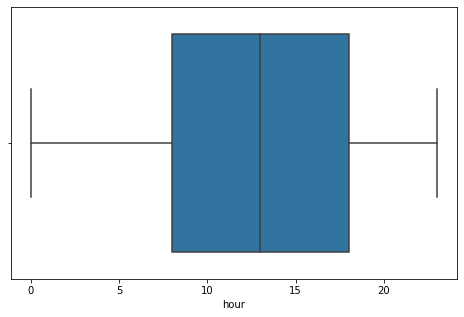

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot('hour',data=train)

In [7]:
test.hour.value_counts()

13    362
19    362
17    362
16    362
15    362
12    362
18    362
8     361
11    361
14    361
9     360
20    360
10    360
21    356
22    355
23    350
7     348
6     321
0     319
1     264
2     225
5     200
3     121
4      94
Name: hour, dtype: int64

In [8]:
train.date[0]

'2018-08-18'

In [3]:
train['date_format'] = pd.to_datetime(train['date'])
train['weekday'] = train['date_format'].dt.day_name()

In [4]:
test['date_format'] = pd.to_datetime(test['date'])
test['weekday'] = test['date_format'].dt.day_name()

In [5]:
#train['date_format'][0].day
train['date_day'] = train.date_format.apply(lambda x: x.day)

In [6]:
#train['date_format'][0].month
train['date_month'] = train.date_format.apply(lambda x: x.month)

In [7]:
test['date_day'] = test.date_format.apply(lambda x: x.day)
test['date_month'] = test.date_format.apply(lambda x: x.month)

In [14]:
test.head(n=30)

,date,hour,date_format,weekday,date_day,date_month
0,2021-03-01,0,2021-03-01,Monday,1,3
1,2021-03-01,1,2021-03-01,Monday,1,3
2,2021-03-01,2,2021-03-01,Monday,1,3
3,2021-03-01,3,2021-03-01,Monday,1,3
4,2021-03-01,5,2021-03-01,Monday,1,3
5,2021-03-01,6,2021-03-01,Monday,1,3
6,2021-03-01,7,2021-03-01,Monday,1,3
7,2021-03-01,8,2021-03-01,Monday,1,3
8,2021-03-01,9,2021-03-01,Monday,1,3
9,2021-03-01,10,2021-03-01,Monday,1,3


In [15]:
train.head(n=30)

,date,hour,demand,date_format,weekday,date_day,date_month
0,2018-08-18,9,91,2018-08-18,Saturday,18,8
1,2018-08-18,10,21,2018-08-18,Saturday,18,8
2,2018-08-18,13,23,2018-08-18,Saturday,18,8
3,2018-08-18,14,104,2018-08-18,Saturday,18,8
4,2018-08-18,15,81,2018-08-18,Saturday,18,8
5,2018-08-18,16,37,2018-08-18,Saturday,18,8
6,2018-08-18,17,27,2018-08-18,Saturday,18,8
7,2018-08-18,18,66,2018-08-18,Saturday,18,8
8,2018-08-18,19,80,2018-08-18,Saturday,18,8
9,2018-08-18,20,52,2018-08-18,Saturday,18,8


In [16]:
mode = train.date.value_counts()
mode.index

Index(['2021-02-28', '2020-06-08', '2018-11-05', '2020-04-05', '2021-01-08',
       '2021-01-05', '2018-11-03', '2020-04-12', '2019-03-02', '2019-04-19',
       ...
       '2018-09-20', '2018-09-04', '2018-08-18', '2019-07-20', '2018-09-05',
       '2019-09-07', '2018-09-03', '2018-09-25', '2019-08-29', '2018-09-30'],
      dtype='object', length=895)

In [10]:
train_new = train.drop(columns=['date', 'date_format'])
test_new = test.drop(columns=['date', 'date_format'])

In [10]:
train_new.head()

,hour,demand,weekday,date_day,date_month
0,9,91,Saturday,18,8
1,10,21,Saturday,18,8
2,13,23,Saturday,18,8
3,14,104,Saturday,18,8
4,15,81,Saturday,18,8


<AxesSubplot:xlabel='hour', ylabel='demand'>

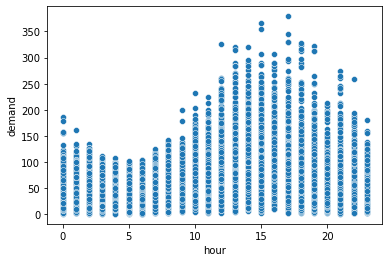

In [19]:
#EDA
sns.scatterplot(x = 'hour',y='demand',data=train_new)
#Between 10AM to 8PM , the car demand is more.

<AxesSubplot:xlabel='date_day', ylabel='demand'>

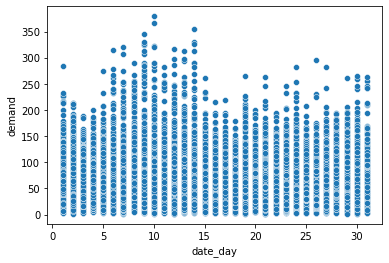

In [20]:
sns.scatterplot(x = 'date_day',y='demand',data=train_new)
#Between 5 and 15 dates the car demand is more.

<AxesSubplot:xlabel='date_month', ylabel='demand'>

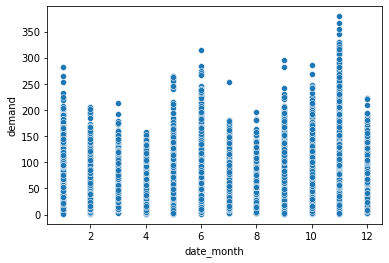

In [21]:
sns.scatterplot(x = 'date_month',y='demand',data=train_new)
#Between 1, 10,11 and 12 month, the car demand is more.

C:\Users\teggiba\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

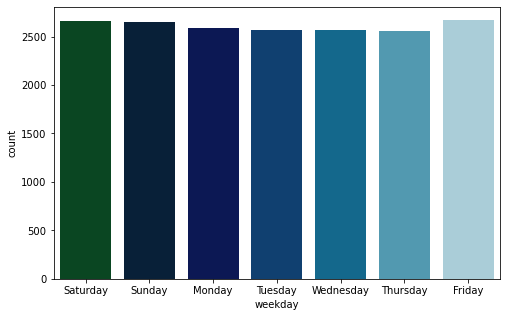

In [22]:
plt.figure(figsize=(8,5))
sns.countplot('weekday',data=train_new,palette='ocean')

<AxesSubplot:xlabel='demand', ylabel='count'>

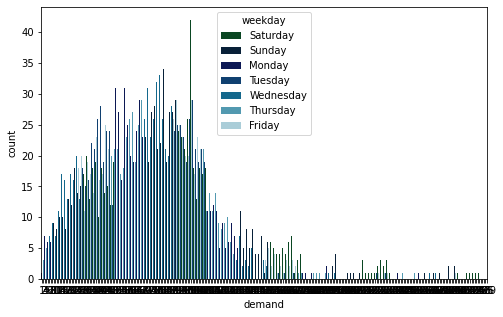

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(hue= 'weekday',x='demand',data=train_new,palette='ocean')

In [24]:
weekend_demand = pd.crosstab(aggfunc="count", index = train_new['weekday'], 
                   columns = train_new['weekday'], values=train_new['demand'])  

In [25]:
weekend_demand
#Car demand remains similar for all days

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
weekday,,,,,,,
Friday,2671.0,NaN,NaN,NaN,NaN,NaN,NaN
Monday,NaN,2589.0,NaN,NaN,NaN,NaN,NaN
Saturday,NaN,NaN,2657.0,NaN,NaN,NaN,NaN
Sunday,NaN,NaN,NaN,2649.0,NaN,NaN,NaN
Thursday,NaN,NaN,NaN,NaN,2552.0,NaN,NaN
Tuesday,NaN,NaN,NaN,NaN,NaN,2564.0,NaN
Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,2565.0


In [26]:
hour_demand = pd.crosstab(aggfunc="count", index = train_new['hour'], 
                   columns = train_new['hour'], values=train_new['demand']) 

In [27]:
hour_demand

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
hour,,,,,,,,,,,,,,,,,,,,,
0,726.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,587.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,553.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,287.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,325.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,338.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,679.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,806.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,870.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\teggiba\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='count'>

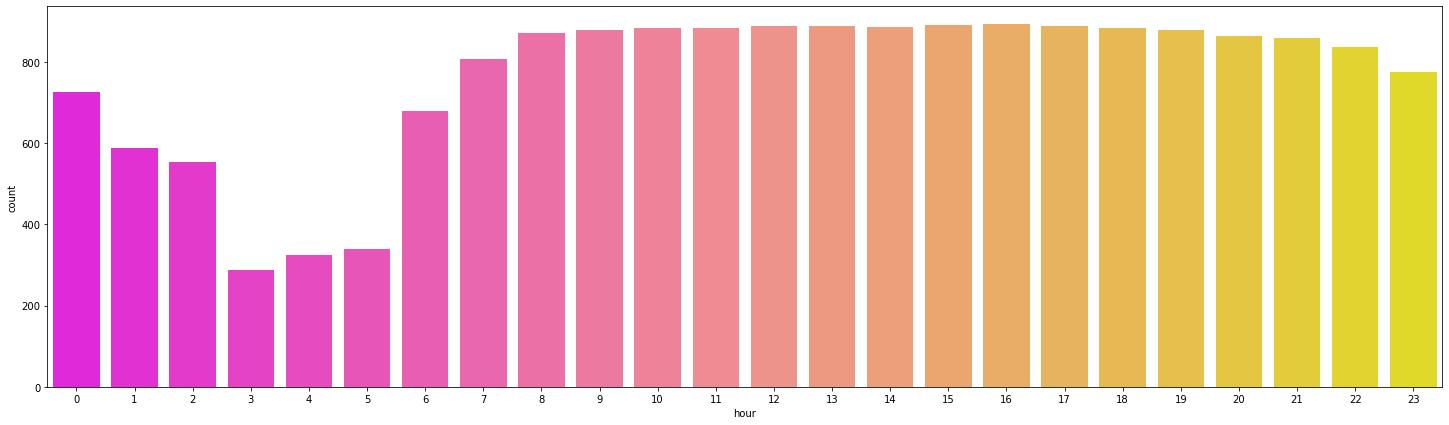

In [28]:
plt.figure(figsize=(25,7))
sns.countplot('hour',data=train_new,palette='spring')

In [11]:
# Labelencoding
le = LabelEncoder()
var_mod = train_new.select_dtypes(include='object').columns
for i in var_mod:
    train_new[i] = le.fit_transform(train_new[i])
    
for i in var_mod:
    test_new[i] = le.fit_transform(test_new[i])

In [12]:
train_new.columns

Index(['hour', 'demand', 'weekday', 'date_day', 'date_month'], dtype='object')

In [13]:
test_new.columns

Index(['hour', 'weekday', 'date_day', 'date_month'], dtype='object')

In [14]:
# Seperate Features and Target
X= train_new.drop(columns = ['demand'], axis=1)
y= train_new['demand']

In [15]:
X

,hour,weekday,date_day,date_month
0,9,2,18,8
1,10,2,18,8
2,13,2,18,8
3,14,2,18,8
4,15,2,18,8
...,...,...,...,...
18242,19,3,28,2
18243,20,3,28,2
18244,21,3,28,2
18245,22,3,28,2


In [20]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [22]:
# define the model
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [31]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
pipeline.fit(X, y)
'''kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))'''

'kfold = KFold(n_splits=10)\nresults = cross_val_score(pipeline, X, y, cv=kfold)\nprint("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))'

In [36]:
submission = pd.read_csv('sample_4E0BhPN.csv')
final_predictions = pipeline.predict(test_new)
submission['demand'] = final_predictions
#only positive predictions for the target variable
submission['demand'] = submission['demand'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)